In [2]:
import numpy as np

# Tạo dữ liệu ngẫu nhiên
X = 2* np.random.rand(100, 1)  # 100 điểm dữ liệu, mỗi điểm có 1 đặc trưng
y = 4 + 3 * X + np.random.randn(100, 1)  # Phương trình: y = 4 + 3X + nhiễu
#print(X)
#print(y)


In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # Thêm cột x0 = 1 vào mỗi dòng dữ liệu
#print(X_b)


In [4]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best


array([[4.03075302],
       [2.94517478]])

In [5]:
# X_new = np.array([[], [2]])  # Các giá trị mới của x1
# X_new_b = np.c_[np.ones((2, 1)), X_new]  # Thêm cột x0 = 1 vào mỗi dòng
# y_predict = X_new_b.dot(theta_best)  # Dự đoán y cho X_new
# y_predict

X_new = np.array([[0], [2],[1], [1.5],[1.75],[0.75],[5]])  # Các giá trị mới của x1
X_new_b = np.c_[np.ones((X_new.shape[0], 1)), X_new]  # Thêm cột x0 = 1 vào mỗi dòng
y_predict = X_new_b.dot(theta_best)  # Dự đoán y cho X_new
y_predict



array([[ 4.03075302],
       [ 9.92110258],
       [ 6.9759278 ],
       [ 8.44851519],
       [ 9.18480888],
       [ 6.2396341 ],
       [18.75662691]])

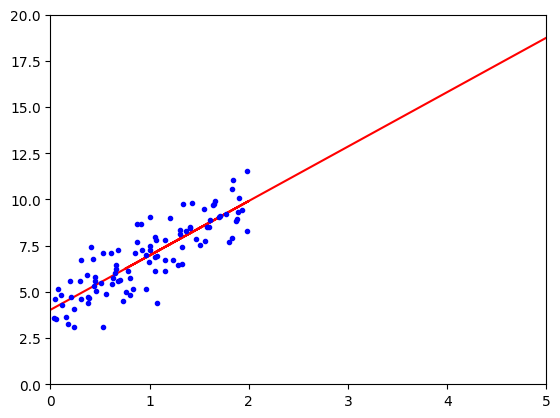

In [6]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")  # Đoạn đường dự đoán (màu đỏ)
plt.plot(X, y, "b.")  # Dữ liệu thực tế (màu xanh)
plt.axis([0,5, 0, 20])  # Cài đặt giới hạn cho trục
plt.show()  # Hiển thị đồ thị


In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)



[4.03075302] [[2.94517478]]


array([[ 4.03075302],
       [ 9.92110258],
       [ 6.9759278 ],
       [ 8.44851519],
       [ 9.18480888],
       [ 6.2396341 ],
       [18.75662691]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd)
y_predict = X_new_b.dot(theta_best_svd)  # Dự đoán y cho X_new
y_predict

[[4.03075302]
 [2.94517478]]


array([[ 4.03075302],
       [ 9.92110258],
       [ 6.9759278 ],
       [ 8.44851519],
       [ 9.18480888],
       [ 6.2396341 ],
       [18.75662691]])

In [9]:
theta_best_pinv = np.linalg.pinv(X_b).dot(y)
print(theta_best_pinv)
y_predict = X_new_b.dot(theta_best_pinv)  # Dự đoán y cho X_new
y_predict


[[4.03075302]
 [2.94517478]]


array([[ 4.03075302],
       [ 9.92110258],
       [ 6.9759278 ],
       [ 8.44851519],
       [ 9.18480888],
       [ 6.2396341 ],
       [18.75662691]])

In [10]:
#Batch Gradient Descent
eta = 0.1# learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)  #random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.03075302],
       [2.94517478]])

In [ ]:
#Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1)  # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients 
theta

array([[4.04972501],
       [2.96579187]])

In [13]:
# Thực hiện Linear Regression với SGD bằng Scikit-Learn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_
# Kết quả: (array([4.24365286]), array([2.8250878]))


(array([4.01691683]), array([3.0077669]))

In [ ]:
# Polynomial Regression
#Bước 1: Tạo dữ liệu phi tuyến
m = 100  # số lượng mẫu
X = 6 * np.random.rand(m, 1) - 3  # giá trị X từ -3 đến 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  # thêm nhiễu
print(X[0])

#Bước 2: Chuyển đổi dữ liệu với PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)  
X_poly = poly_features.fit_transform(X)
print(X_poly[0])

#Bước 3: Huấn luyện mô hình Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

#Bước 4: Predict X_new
X_new = np.linspace(-3, 3, 100).reshape(100, 1)  # Dữ liệu mới
X_new_poly = poly_features.transform(X_new)  # Chuyển đổi sang dạng đa thức
y_new_pred = lin_reg.predict(X_new_poly)  # Dự đoán
print(y_new_pred)

# Vẽ biểu đồ
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue', label='Dữ liệu thực tế')  # Dữ liệu thực tế
plt.plot(X_new, y_new_pred, color='red', linewidth=2, label='Hồi quy đa thức')  # Đường dự đoán
plt.xlabel('X')
plt.ylabel('y')
plt.title('Hồi quy đa thức với Scikit-Learn')
plt.legend()
plt.show()



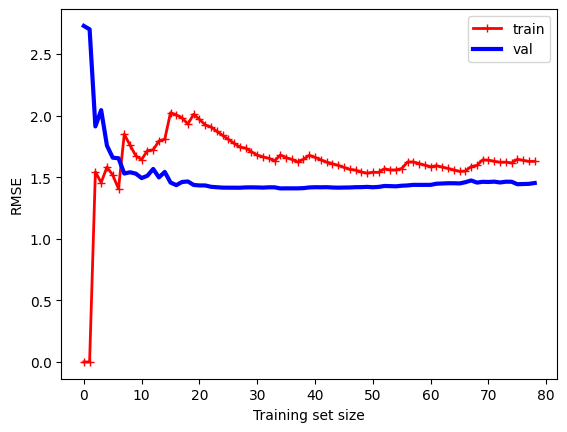

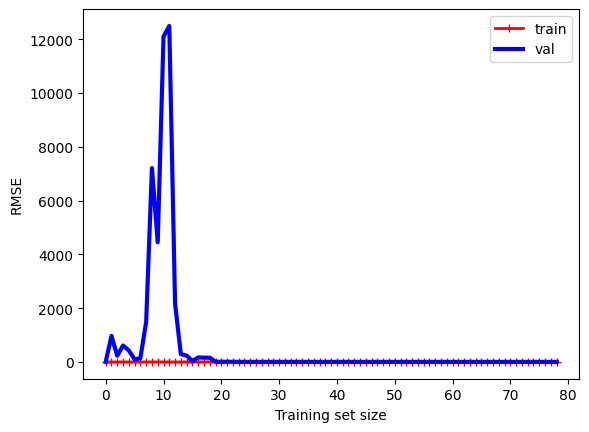

In [25]:
#Learning Curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.show()
#Ví dụ sử dụng LinearRegression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

#Ví dụ sử dụng PolynomialFeatures
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)



In [ ]:
# Regularized Linear Models
#Ridge Regression

##Thực hiện Ridge Regression trong Scikit-
#Cách 1: Closed-Form Solution
from sklearn.linear_model import Ridge
import numpy as np
m = 100
X = 6 * np.random.rand(m, 1) - 3  # giá trị X từ -3 đến 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  # thêm nhiễu
# X = 2* np.random.rand(100, 1)  # 100 điểm dữ liệu, mỗi điểm có 1 đặc trưng
# y = 4 + 3 * X + np.random.randn(100, 1)  # Phương trình: y = 4 + 3X + nhiễu
# Ridge Regression với solver "cholesky"
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)  # Huấn luyện mô hình
prediction = ridge_reg.predict([[1.5]])  # Dự đoán
print(prediction)  # Kết quả: array([[1.55071465]])

#Cách 2: Gradient Descent
from sklearn.linear_model import SGDRegressor
# Ridge Regression với Stochastic Gradient Descent
sgd_reg = SGDRegressor(penalty="l2")  # Regularization dạng l2
sgd_reg.fit(X, y.ravel())  # Huấn luyện mô hình
prediction = sgd_reg.predict([[1.5]])  # Dự đoán
print(prediction)  # Kết quả: array([1.47012588])

#Ridge Regression với PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# Tạo pipeline kết hợp PolynomialFeatures, StandardScaler và Ridge Regression
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10)),
    ("scaler", StandardScaler()),
    ("ridge_reg", Ridge(alpha=1))
])

# Huấn luyện và dự đoán
model.fit(X, y)
prediction = model.predict([[1.5]])
print(prediction)




[[4.93727021]]
[4.91305331]
[[4.09064722]]


In [ ]:
# Regularized Linear Models

#Thực hiện Lasso Regression với Scikit-Learn
from sklearn.linear_model import Lasso
import numpy as np
m = 100
X = 6 * np.random.rand(m, 1) - 3  # giá trị X từ -3 đến 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  # thêm nhiễu
# Khởi tạo mô hình Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)  # Huấn luyện mô hình
prediction = lasso_reg.predict([[1.5]])  # Dự đoán
print(prediction)

#Kết hợp với PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Pipeline: PolynomialFeatures + StandardScaler + Lasso Regression
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10)),
    ("scaler", StandardScaler()),
    ("lasso_reg", Lasso(alpha=0.1))
])

# Huấn luyện và dự đoán
model.fit(X, y)
prediction = model.predict([[1.5]])
print(prediction)


[5.23286002]
[4.79825917]


In [1]:
# Regularized Linear Models
#Thực hành với Elastic Net trong Scikit-Learn

from sklearn.linear_model import ElasticNet
import numpy as np
m = 100
X = 6 * np.random.rand(m, 1) - 3  # giá trị X từ -3 đến 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  # thêm nhiễu
# Tạo mô hình Elastic Net
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio là tỷ lệ r
elastic_net.fit(X, y)  # Huấn luyện mô hình
predictions = elastic_net.predict([[1.5]])  # Dự đoán
print(predictions)

# Kết hợp với PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Pipeline: Tăng bậc đa thức + Chuẩn hóa + Elastic Net
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("elastic_net", ElasticNet(alpha=0.1, l1_ratio=0.5))
])

# Huấn luyện và dự đoán
model.fit(X, y)
prediction = model.predict([[1.5]])
print(prediction)


[4.96118735]
[4.46812742]


In [8]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Tạo dữ liệu mẫu
X, y = make_regression(
    n_samples=200,  # Số lượng mẫu
    n_features=1,   # Số lượng đặc trưng
    noise=15,       # Nhiễu trong dữ liệu
    random_state=42 # Đảm bảo kết quả có thể tái tạo
)

# Chia dữ liệu thành tập huấn luyện và tập validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2,      # 20% dữ liệu cho tập validation
    random_state=42     # Đảm bảo kết quả có thể tái tạo
)

print("Kích thước tập huấn luyện:", X_train.shape, y_train.shape)
print("Kích thước tập validation:", X_val.shape, y_val.shape)

# Chuẩn bị dữ liệu
# Gợi ý sửa đổi:
# Thử các thay đổi sau:

# Giảm bậc của PolynomialFeatures xuống mức hợp lý hơn, ví dụ: degree=2 hoặc degree=3.
# Thử nghiệm với eta0 khác nhau, chẳng hạn: 0.01, 0.005, hoặc 0.1.
# Tăng số vòng lặp (epoch) nếu cần.
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# Khởi tạo SGDRegressor
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.1)

minimum_val_error = np.inf
best_epoch = None
best_model = None

# Vòng lặp huấn luyện với Early Stopping
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # Tiếp tục từ trạng thái trước đó
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

print("Best epoch:", best_epoch)


Kích thước tập huấn luyện: (160, 1) (160,)
Kích thước tập validation: (40, 1) (40,)
Best epoch: 83


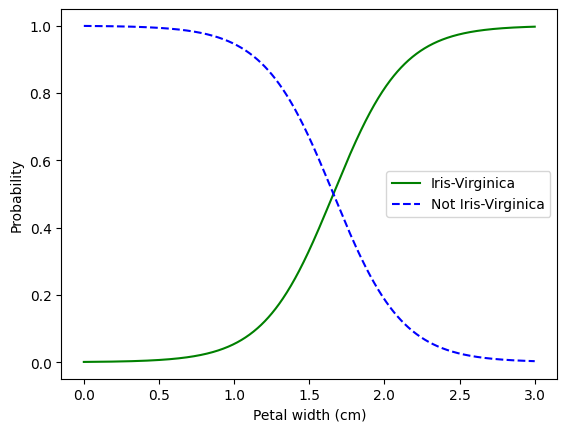

In [1]:
#Decision Boundaries (Ranh giới quyết định) và Logistic Regression trên Iris Dataset
#a. Tải dữ liệu và chuẩn bị
from sklearn import datasets
import numpy as np

# Tải dữ liệu Iris
iris = datasets.load_iris()

# X là chiều rộng cánh hoa (cột thứ 3)
X = iris["data"][:, 3:]

# y là nhãn: 1 nếu Iris-Virginica, 0 nếu không
y = (iris["target"] == 2).astype(int)

#b. Huấn luyện Logistic Regression
from sklearn.linear_model import LogisticRegression
# Khởi tạo và huấn luyện mô hình
log_reg = LogisticRegression()
log_reg.fit(X, y)

#c. Dự đoán xác suất
# Tạo dữ liệu mới (chiều rộng cánh hoa từ 0 đến 3 cm)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
# Dự đoán xác suất
y_proba = log_reg.predict_proba(X_new)

#d. Vẽ đồ thị ranh giới quyết định
import matplotlib.pyplot as plt

# Vẽ đồ thị xác suất
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

# Tô điểm đồ thị
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend()
plt.show()

